/home/abdul/Desktop/project1/cats
/home/abdul/Desktop/project1/dogs
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 62, 62, 3)         30        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 62, 62, 10)        280       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 31, 31, 3)         273       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 31, 31, 5)         380       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_2

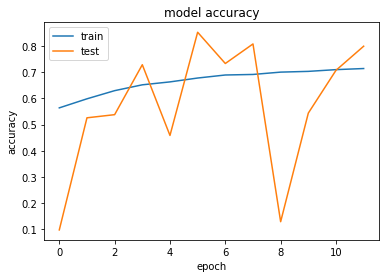

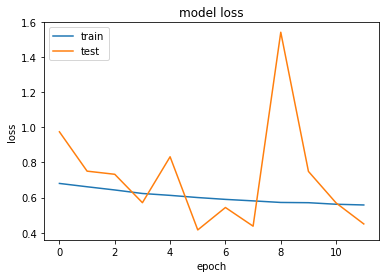

In [6]:
import numpy as np
import cv2 as cv
import os
import random
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import TensorBoard



#base_dir = os.path.dirname(__file__)
base_dir = r'/home/abdul/Desktop/project1'
cats_folder = os.path.join(base_dir, "cats")
dogs_folder = os.path.join(base_dir, "dogs")


print(cats_folder)
print(dogs_folder)

cats_images = os.listdir(cats_folder)
dogs_images = os.listdir(dogs_folder)

cats_images_array = np.array([cv.imread(os.path.join(os.path.abspath(cats_folder), i), cv.IMREAD_GRAYSCALE).reshape(64 ,64 ,1) for i in cats_images ])
dogs_images_array = np.array([cv.imread(os.path.join(os.path.abspath(dogs_folder), i), cv.IMREAD_GRAYSCALE).reshape(64 ,64 ,1) for i in cats_images ])

cats_images_labels = np.array([[1]] * len(cats_images_array))
dogs_images_labels = np.array([[0]] * len(dogs_images_array))

ff_d = np.concatenate([cats_images_array, dogs_images_array])
ff_l = np.concatenate([cats_images_labels, dogs_images_labels])

trainX =ff_d[0:23500,:,:,:]
trainY = ff_l[0:23500,:]

testX= ff_d[23500:25000, :, :, :]
testY = ff_l[23500:25000, :]

batch_size = 64
num_classes = 2
epochs = 12
im_width = 64
Im_height = 64
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(64, 64, 1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(num_classes,activation="sigmoid"))
model.summary()

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
history =model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, verbose=1, shuffle=True, validation_data=(testX,testY))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


/home/abdul/Desktop/project1/cats
/home/abdul/Desktop/project1/dogs
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 62, 62, 3)         30        
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 62, 62, 5)         140       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 62, 62, 5)         0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 5)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 31, 31, 5)         230       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 31, 31, 3)         378       
_________________________________________________________________
max_pool

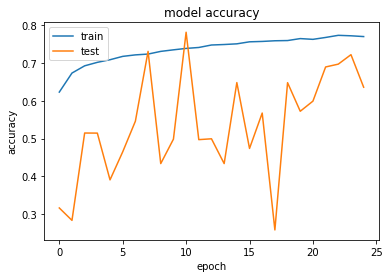

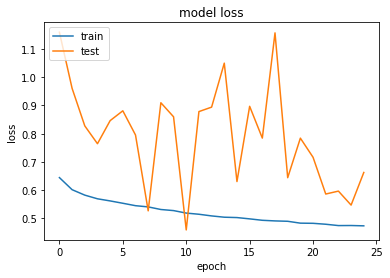

In [8]:
import numpy as np
import cv2 as cv
import os
import random
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.layers.advanced_activations import LeakyReLU, PReLU



#base_dir = os.path.dirname(__file__)
base_dir = r'/home/abdul/Desktop/project1'
cats_folder = os.path.join(base_dir, "cats")
dogs_folder = os.path.join(base_dir, "dogs")


print(cats_folder)
print(dogs_folder)

cats_images = os.listdir(cats_folder)
dogs_images = os.listdir(dogs_folder)

cats_images_array = np.array([cv.imread(os.path.join(os.path.abspath(cats_folder), i), cv.IMREAD_GRAYSCALE).reshape(64 ,64 ,1) for i in cats_images ])
dogs_images_array = np.array([cv.imread(os.path.join(os.path.abspath(dogs_folder), i), cv.IMREAD_GRAYSCALE).reshape(64 ,64 ,1) for i in cats_images ])

cats_images_labels = np.array([[1]] * len(cats_images_array))
dogs_images_labels = np.array([[0]] * len(dogs_images_array))

ff_d = np.concatenate([cats_images_array, dogs_images_array])
ff_l = np.concatenate([cats_images_labels, dogs_images_labels])

trainX =ff_d[0:21000,:,:,:]
trainY = ff_l[0:21000,:]

testX= ff_d[21000:25000, :, :, :]
testY = ff_l[21000:25000, :]

batch_size = 64
num_classes = 2
epochs = 25
im_width = 64
Im_height = 64
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(64, 64, 1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=5,activation="linear",padding="same"))
model.add(LeakyReLU(alpha=.05))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=5,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(5,5),filters=3,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(90,activation="sigmoid"))
model.add(Dense(num_classes,activation="sigmoid"))
model.summary()

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
history =model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, verbose=1, shuffle=True, validation_data=(testX,testY))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
